### **Перевірка даних на нормальність за допомогою критерію Шапіро-Уілка**




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
df = pd.DataFrame()
for i in range(6):
    if i<3:
        df[f"var{i+1}"] = np.random.normal(loc=10, scale=3, size=20)
    else:
        df[f"var{i+1}"] = np.random.lognormal(mean=2, sigma=1, size=20)
df

,var1,var2,var3,var4,var5,var6
0,8.500806,3.890940,6.278792,8.974512,6.847682,4.914258
1,10.683387,8.655482,10.907020,6.853488,9.156668,3.457369
2,11.333935,7.843270,10.125985,1.536677,2.614481,33.943061
3,19.170600,10.399989,3.042407,6.894251,7.340153,7.898774
4,9.134967,13.317221,13.849062,8.355102,2.999460,8.360379
5,7.531705,12.117448,4.775314,45.478356,11.231473,8.653744
6,8.591277,8.157186,14.026964,45.118363,5.878608,7.060993
7,10.619689,13.654611,13.380759,46.031818,5.200315,5.487284
8,8.710713,10.365320,9.137058,41.757938,5.078529,14.198110
9,11.641211,7.952238,8.161574,1.808930,6.304260,2.107885


In [3]:
coefs = pd.read_excel("Coeficients for the W test for normality.xlsx")
coefs.fillna(0, inplace=True)
coefs.head()

,i\n,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0
0,1.0,0.7071,0.7071,0.6872,0.6646,0.6431,0.6233,0.6052,0.5888,0.5739,...,0.3940,0.3917,0.3894,0.3872,0.3850,0.3830,0.3808,0.3789,0.3770,0.3751
1,2.0,0.0000,0.0000,0.1677,0.2413,0.2806,0.3031,0.3164,0.3244,0.3291,...,0.2719,0.2701,0.2684,0.2667,0.2651,0.2635,0.2620,0.2604,0.2589,0.2574
2,3.0,0.0000,0.0000,0.0000,0.0000,0.0875,0.1401,0.1743,0.1976,0.2141,...,0.2357,0.2345,0.2334,0.2323,0.2313,0.2302,0.2291,0.2281,0.2271,0.2260
3,4.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0561,0.0947,0.1224,...,0.2091,0.2085,0.2078,0.2072,0.2065,0.2058,0.2052,0.2045,0.2038,0.2032
4,5.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0399,...,0.1876,0.1874,0.1871,0.1868,0.1865,0.1862,0.1859,0.1855,0.1851,0.1847


In [4]:
tab_w = pd.read_excel("Рoints of the distribution of W.xlsx")
tab_w.head()

,n,0-5
0,3.0,0.767
1,4.0,0.748
2,5.0,0.762
3,6.0,0.788
4,7.0,0.803


In [5]:
def SW_test(y):
    y = sorted(y)
    
    n = len(y)
    S_sqr = np.sum(np.power(y, 2)) - (1/n) * np.power(np.sum(y), 2)
    S_sqr

    n = len(y)
    a = np.zeros(n)
    coef_col = coefs[n]
    n_count = n-1
    for i in range(n):
        a[n_count] = coef_col[i]
        n_count -= 1

    b = 0
    n_count = n - 1
    k = n // 2
    for i in range(k+1):
        b += a[n_count] * (y[n_count] - y[i])
        n_count -= 1
    W = np.power(b, 2) / S_sqr

    point = tab_w.loc[tab_w.n == n]
    if W>(point.iloc[0, 1]):
        inference = "normal"
    elif W<(point.iloc[0, 1]):
        inference = "non-normal"

    return inference

In [6]:
m = df.shape[1]
sw_result = [0] * m
for i in range(m):
    sw_result[i] = SW_test(df.iloc[:, i])
sw_result = np.asarray(sw_result)
sw_result

array(['non-normal', 'normal', 'normal', 'non-normal', 'non-normal',
       'non-normal'], dtype='<U10')

In [7]:
cols = ["Variable", "Statistics", "Distribution"]
final_df = pd.DataFrame(index=np.arange(6), columns=cols)
final_df

,Variable,Statistics,Distribution
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN


In [8]:
var_labels = df.columns
final_df.Variable = var_labels
final_df

,Variable,Statistics,Distribution
0,var1,NaN,NaN
1,var2,NaN,NaN
2,var3,NaN,NaN
3,var4,NaN,NaN
4,var5,NaN,NaN
5,var6,NaN,NaN


In [9]:
final_df.Distribution = sw_result
final_df

,Variable,Statistics,Distribution
0,var1,NaN,non-normal
1,var2,NaN,normal
2,var3,NaN,normal
3,var4,NaN,non-normal
4,var5,NaN,non-normal
5,var6,NaN,non-normal


In [10]:
for i in range(m):
    if sw_result[i]=="normal":
        mean = np.round(np.mean(df.iloc[:, i]), 6)
        std = np.round(np.std(df.iloc[:, i]), 6)
        final_df.iloc[i, 1] = f"{mean} [{std}]"
final_df

,Variable,Statistics,Distribution
0,var1,NaN,non-normal
1,var2,9.891645 [3.179765],normal
2,var3,9.545358 [3.012717],normal
3,var4,NaN,non-normal
4,var5,NaN,non-normal
5,var6,NaN,non-normal


In [11]:
for i in range(m):
    if sw_result[i]=="non-normal":
        median = np.round(np.median(df.iloc[:, i]), 6)
        q_25 = np.round(np.quantile(df.iloc[:, i], 0.25), 6)
        q_75 = np.round(np.quantile(df.iloc[:, i], 0.75), 6)
        final_df.iloc[i, 1] = f"{median} [{q_25}; {q_75}]"
final_df

,Variable,Statistics,Distribution
0,var1,10.613871 [8.446847; 11.752256],non-normal
1,var2,9.891645 [3.179765],normal
2,var3,9.545358 [3.012717],normal
3,var4,6.873869 [3.54222; 24.168576],non-normal
4,var5,8.312608 [5.844158; 11.382715],non-normal
5,var6,8.24116 [6.608075; 14.695391],non-normal


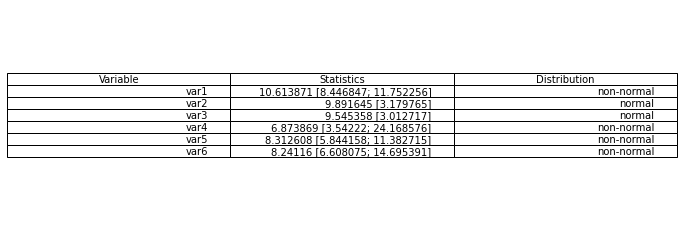

In [12]:
fig, ax = plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
final_table = ax.table(cellText=final_df.values,colLabels=final_df.columns,loc='center')

pp = PdfPages("final_table.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()